In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Mínimos Cuadrados

In [ ]:
x = np.array([1, 2, 2, 3, 4, 4, 5, 6])
y = np.array([2, 3, 4, 4 ,4, 6, 5, 7])

d = {'x': x, 'y': y}
df = pd.DataFrame(data=d)
df

,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [ ]:
#Calcular columnas xy y x^2
df["xy"] = df["x"] * df["y"]
df["x2"] = df["x"] * df["x"]
df

,x,y,xy,x2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36


In [ ]:
n = len(df)
sumX = df["x"].sum()
sumY = df["y"].sum()
sumXY = df["xy"].sum()
sumX2 = df["x2"].sum()

print(n, sumX, sumY, sumXY, sumX2)

8 27 35 135 111


In [ ]:
def get_pendiente(sumX, sumY, sumXY, sumX2, n):
    pendiente = (n * sumXY - sumX * sumY) / (n * sumX2 - sumX ** 2)
    return pendiente

def get_intercepcion(y, x, pendiente, n):
    intercepcion = y/n - pendiente * x / n
    return intercepcion

In [ ]:
m = get_pendiente(sumX=sumX, sumY=sumY, sumXY=sumXY, sumX2=sumX2, n=n)
print(m)

0.8490566037735849


In [ ]:
b = get_intercepcion(y=sumY, x=sumX, pendiente=m, n=n)
print(b)

1.5094339622641506


In [ ]:
def get_predict():
  y = df["x"] * m + b
  return y

In [ ]:
ypre = get_predict()

df["ypre"] = get_predict()
df["y-ypre"] = df["y"] - df["ypre"]
df["(y-ypre)2"] = df["y-ypre"] ** 2

r = df["(y-ypre)2"].sum()
print("m=", m)
print("b=", b)
print("r=", r)
df

m= 0.8490566037735849
b= 1.5094339622641506
r= 3.5471698113207544


,x,y,xy,x2,ypre,y-ypre,(y-ypre)2
0,1,2,2,1,2.358491,-0.358491,0.128515
1,2,3,6,4,3.207547,-0.207547,0.043076
2,2,4,8,4,3.207547,0.792453,0.627981
3,3,4,12,9,4.056604,-0.056604,0.003204
4,4,4,16,16,4.905660,-0.905660,0.820221
5,4,6,24,16,4.905660,1.094340,1.197579
6,5,5,25,25,5.754717,-0.754717,0.569598
7,6,7,42,36,6.603774,0.396226,0.156995


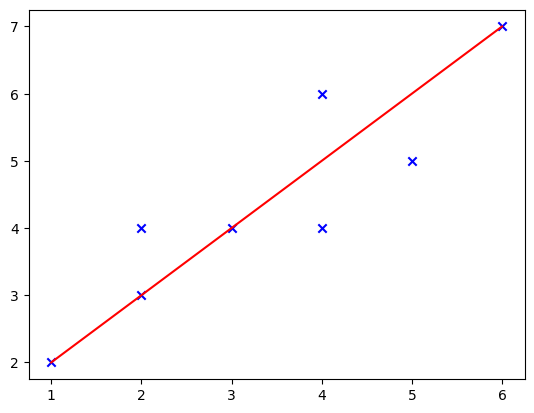

In [ ]:
plt.scatter(df["x"], df["y"], marker="x", c="blue")
plt.plot([df["x"].iloc[0], df["x"].iloc[-1]], [df["y"].iloc[0], df["y"].iloc[-1]], color="red")

#Regresión Líneal Simple

In [ ]:
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
def generador_datos_simple(beta, muestras, desviacion):
# Genero n (muestras) valores de x aleatorios entre 0 y 100
  x = np.random.random(muestras) * 100
# Genero un error aleatorio gaussiano con desviación típica (desviacion)
  e = np.random.randn(muestras) * desviacion
# Obtengo el y real como x*beta + error
  y = x * beta + e
  #return x.reshape((-1,1)), y.reshape((-1,1))
  return x.reshape((-1,1)), y


In [ ]:
# Parámetros de la distribución
desviacion = 200
beta = 10
muestras = 50
x, y = generador_datos_simple(beta, muestras, desviacion)
print(x.shape)
print(y.shape)

(50, 1)
(50,)


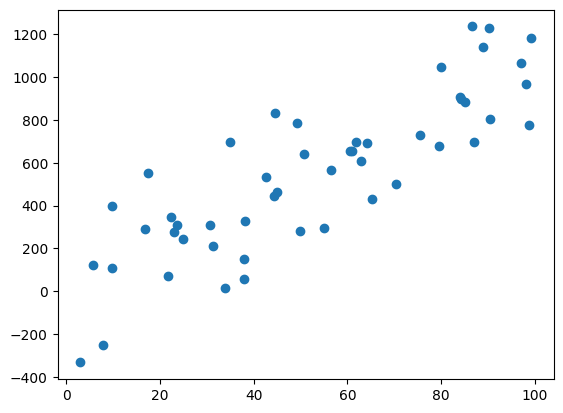

In [ ]:
# Represento los datos generados
plt.scatter(x, y)

In [ ]:
# Creo un modelo de regresión lineal
model = linear_model.LinearRegression()

# Entreno el modelo con los datos (X,Y)
model.fit(x, y)
# Ahora puedo obtener el coeficiente b_1
print ('Coeficient: ', model.coef_[0])
print('Intercept:', model.intercept_)
print('R^2: ', model.score(x, y))


# Podemos predecir usando el modelo
y_pred = model.predict(x)

# Por último, calculamos el error cuadrático medio y el estadístico R^2
print (f'\nError cuadrático medio:', mean_squared_error(y, y_pred))
print ('Estadístico R_2:', r2_score(y, y_pred))


Coeficient:  10.79703733523582
Intercept: -25.311350849414566
R^2:  0.7141709116627436

Error cuadrático medio: 37889.33104684765
Estadístico R_2: 0.7141709116627436


#Regresión Líneal Multiple

In [ ]:
def generador_datos_multiple(coeficientes, muestras, std_dev):
 """

 Args:
   coeficientes:
   muestras:
   std_dev:

 Returns:

 """
# Calculamos el número de predictores y creamos una matriz
# con los coeficientes con p filas y 1 columna para
# multiplicación de matrices
 n_coeficientes = len(coeficientes)
 #print(n_coeficientes)
 coef_matriz = np.array(coeficientes).reshape(n_coeficientes, 1)
# Igual que en el caso de regresión lineal simple
 x = np.random.random_sample((muestras, n_coeficientes)) * 100
# Genero un error aleatorio gaussiano con desviación típica (std_dev)
 epsilon = np.random.randn(muestras) * std_dev
 #print(epsilon)
# Como x es una matriz muestras x n_coeficientes, y
# coef_matriz es n_coeficientes x 1
# Podemos hacer multiplicación de matrices para obtener y
# dados x1,x2,...,xn necesitamos hacer la transpuesta
# para obtener un array 1xmuestras en lugar de muestrasx1 para
# usar la regresión
 y = np.matmul(x, coef_matriz).transpose() + epsilon
 return x, y


In [ ]:
# Genero los datos que ajustaré con la recta
coeficientes_reales =[10, 5]
muestras = 200
std_dev = 100
X, Y = generador_datos_multiple(coeficientes_reales, muestras, std_dev)

In [ ]:
# Creo un modelo de regresión lineal
model = linear_model.LinearRegression()

# Entreno el modelo con los datos (X,Y)
model.fit(X, Y.transpose())
# Ahora puedo obtener el coeficiente b_1
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Podemos predecir usando el modelo
y_pred = model.predict(X)


Coefficients: [[10.11851578  4.84780842]]
Intercept: [2.67526703]


Text(0, 0.5, 'X')

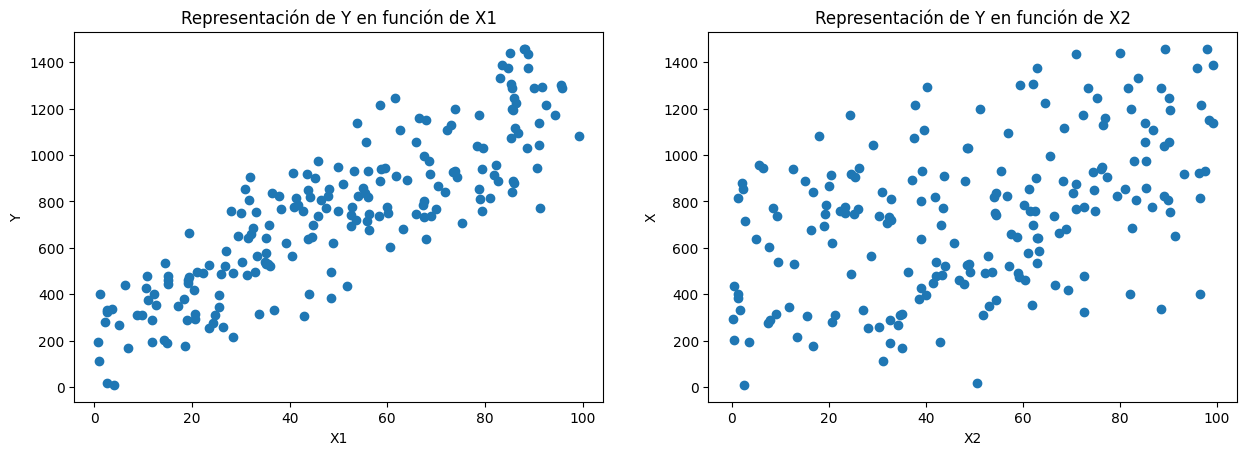

In [ ]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)

# Represento los puntos para la variable X1 y para Y
p1.scatter(X[:,0], Y)
p1.set_title('Representación de Y en función de X1')
p1.set_xlabel('X1')
p1.set_ylabel('Y')

p2.scatter(X[:,1], Y)
p2.set_title('Representación de Y en función de X2')
p2.set_xlabel('X2')
p2.set_ylabel('X')


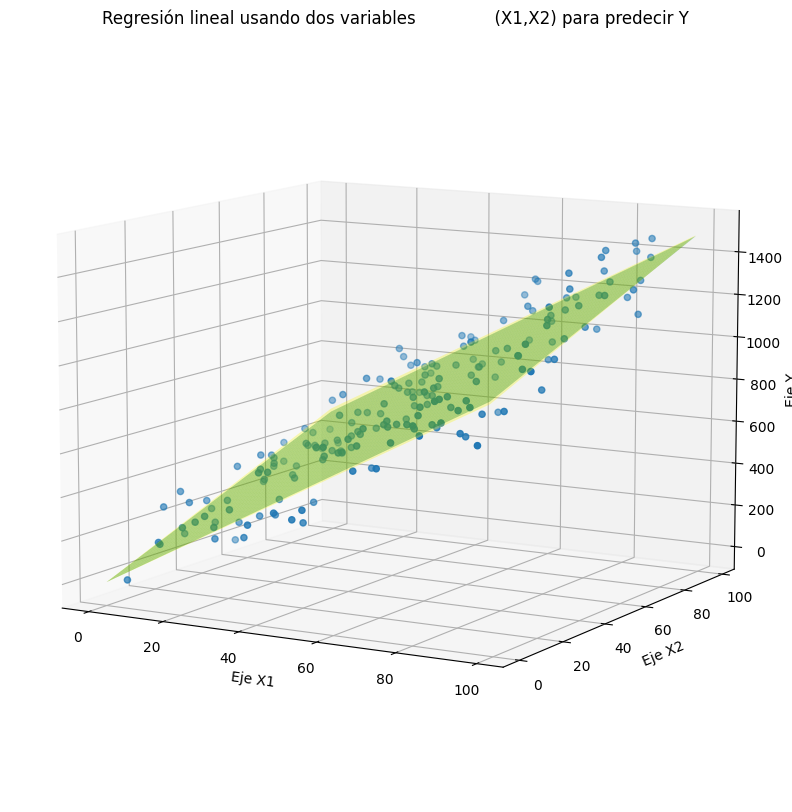

In [ ]:
# Represento la superficie que ajusta mejor a los datos
fig = plt.figure(figsize=(15,10))
p3 = fig.add_subplot(111, projection='3d') # Use add_subplot to create a subplot with the desired projection
x1, x2 = np.meshgrid(range(100), range(100))
# Superficie que se obtiene con la regresión lineal múltiple
z_modelo = model.coef_[0][0]*x1 + model.coef_[0][1]*x2
# Superficie real de los datos
z_real = coeficientes_reales[0]*x1 + coeficientes_reales[1]*x2
# Represento ambas superficies
p3.plot_surface(x1, x2, z_modelo, alpha=0.3, color='green')
p3.plot_surface(x1, x2, z_real, alpha=0.3, color='yellow')
# Represento también los datos para ver el ajuste
p3.scatter(X[:,0], X[:,1], Y)
p3.set_title(u'Regresión lineal usando dos variables \
              (X1,X2) para predecir Y')
p3.set_xlabel('Eje X1')
p3.set_ylabel('Eje X2')
p3.set_zlabel('Eje Y')
p3.view_init(10, )
plt.show()

#Tarea
- Crear Dataframe con columnas X1, X2, Y.
- Crear 20 filas minimo
- Graficar X1 Vs Y, X2 Vs Y.
- Realizar Regresión Lineal Multiple.
- Hallar coeficientes e interceptos.
- Imprimir en pantalla la ecuación de resultado

In [ ]:
n = 20
df = pd.DataFrame()
df["x1"] = np.random.random(n) * 100
df["x2"] = np.random.random(n) * 100
df["y"] = df["x1"]*10 + df["x2"]*5 + np.random.randn(n) * 10

df["x1"]

,x1
0,56.279560
1,32.979686
2,17.344346
3,75.056061
4,12.332549
5,15.835233
6,11.112595
7,56.414938
8,91.415592
9,7.712132


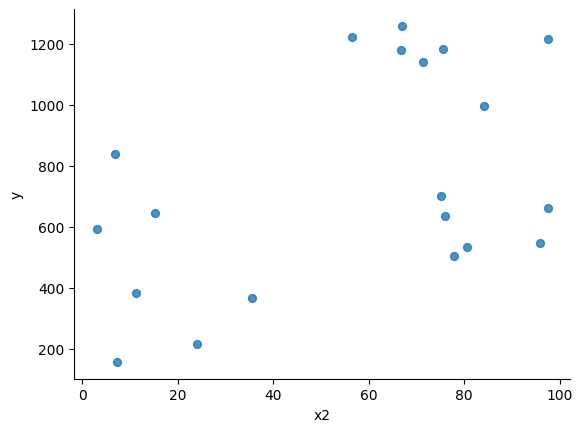

In [ ]:
# @title x2 vs y

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='x2', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
model = linear_model.LinearRegression()
X = df[["x1", "x2"]]
y = df["y"]

#model.fit(df[["x1", "x2"]], df["y"])
model.fit(X, y)

LinearRegression()

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print(f"y = {model.coef_[0]} x1 + {model.coef_[1]} x2 + {model.intercept_}")


Coefficients: [9.95286444 4.92736706]
Intercept: 10.880894293820916
y = 9.952864440279816 x1 + 4.927367056309048 x2 + 10.880894293820916


Text(0, 0.5, 'y')

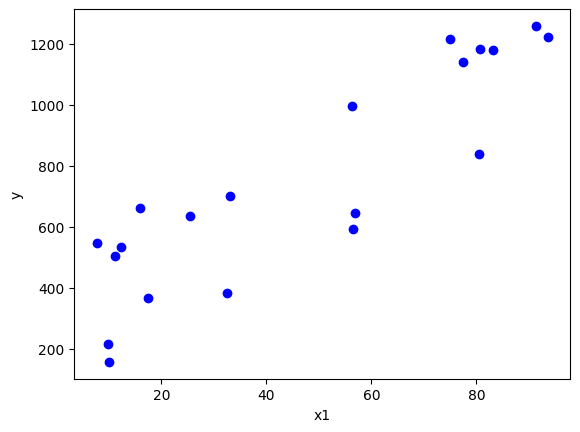

In [ ]:
plt.scatter(df["x1"], df["y"], c="b", marker="o")
plt.xlabel("x1")
plt.ylabel("y")


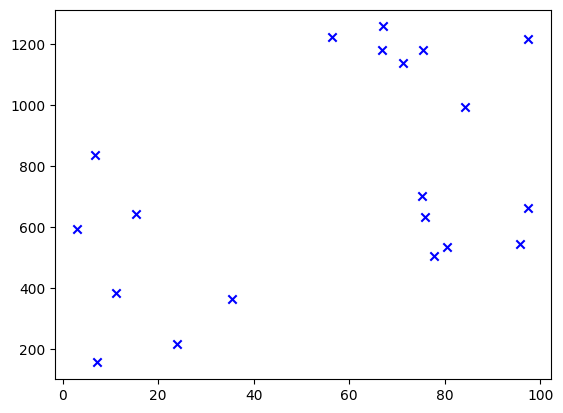

In [ ]:
plt.scatter(df["x2"], df["y"], c="b", marker="x")